<a href="https://colab.research.google.com/github/yasmin-michelin/k_means_clustering_retail/blob/main/Customer_segmentation_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and exploratory data analysis

In [1]:
#!pip install sweetviz #installing library for one line code EDA
#import sweetviz as sv
import os
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
import multiprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample


Olist_customers_dataset = pd.read_csv("/content/drive/MyDrive/Analytics/Olist Project/Database/olist_customers_dataset_2.csv")
Olist_order_items_dataset = pd.read_csv("/content/drive/MyDrive/Analytics/Olist Project/Database/olist_order_items_dataset_2.csv")
Olist_orders_dataset = pd.read_csv("/content/drive/MyDrive/Analytics/Olist Project/Database/olist_orders_dataset_2.csv")
Olist_order_payment_dataset = pd.read_csv("/content/drive/MyDrive/Analytics/Olist Project/Database/olist_order_payments_dataset_2.csv")
#Olist_order_reviews_dataset = pd.read_csv("/content/drive/MyDrive/Analytics/Olist Project/Database/olist_order_reviews_dataset.csv")
#Olist_products_dataset = pd.read_excel("/content/drive/MyDrive/Analytics/Olist Project/Database/olist_products_dataset.xlsx")
#Olist_geolocation_dataset = pd.read_csv("/content/drive/MyDrive/Analytics/Olist Project/Database/olist_geolocation_dataset.csv")
#Olist_sellers_dataset = pd.read_excel("/content/drive/MyDrive/Analytics/Olist Project/Database/olist_sellers_dataset.xlsx")
#Olist_product_translation_dataset = pd.read_excel("/content/drive/MyDrive/Analytics/Olist Project/Database/product_category_name_translation.xlsx")

In [2]:
Olist_customers_dataset.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [3]:
#analyzing the dataset
#advert_report = sv.analyze(Olist_customers_dataset)

In [4]:
#display the report -> access files to download and see it in your browser
#advert_report.show_html('Olist_customers.html')

In [5]:
Olist_order_items_dataset.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [6]:
#analyzing the dataset
#advert_report_2 = sv.analyze(Olist_order_items_dataset)
#display the report -> access files to download and see it in your browser
#advert_report_2.show_html('Olist_order_items_dataset.html')

In [7]:
Olist_orders_dataset.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [8]:
#analyzing the dataset
#advert_report_3 = sv.analyze(Olist_orders_dataset)
#display the report -> access files to download and see it in your browser
#advert_report_3.show_html('Olist_orders_dataset.html')

In [9]:
Olist_order_payment_dataset.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [10]:
#analyzing the dataset
#advert_report_4 = sv.analyze(Olist_order_payment_dataset)
#display the report -> access files to download and see it in your browser
#advert_report_4.show_html('Olist_order_payment_dataset.html')

# Preparing the data sets

In [11]:
# got a different result from
Olist_orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
Olist_datasets_merged = Olist_orders_dataset.merge(Olist_order_items_dataset,on='order_id').merge(Olist_order_payment_dataset, on='order_id').merge(Olist_customers_dataset,on='customer_id')
display(Olist_datasets_merged)

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
117596    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-10-18 00:00:00              1   
2                2017-10-18 00:00:00              1   
3                2018-08-13 00:00:00              1   
4                2018-09-04 00:00:00              1   
...                              ...            ...   
117596           2018-03-02 00:00:00              1   
117597           2017-09-27 00:00:00              1   
117598           2018-02-15 00:00:00              1   
117599           2018-02-15 00:00:00              2   
117600           2018-04-03 00:00:00              1   

                              product_id  ...   price freight_value  \
0       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
1       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
2       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
3       595fac2a385ac33a80bd5114aec74eb8  ...  118.70         22.76   
4       aa4383b373c6aca5d8797843e5594415  ...  159.90         19.22   
...                                  ...  ...     ...           ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...  174.90         20.10   
117597  b80910977a37536adeddd63663f916ad  ...  205.99         65.02   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  ...  179.99         40.59   
117599  d1c427060a0f73f6b889a5c7c61f2ac4  ...  179.99         40.5

In [13]:
Olist_datasets_merged.shape

(117601, 22)

In [14]:
Olist_datasets_merged.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [15]:
Olist_datasets_merged[Olist_datasets_merged.isna().any(axis=1)]

order_id                       customer_id  \
8       136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
51      ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
125     0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
155     15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
192     6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                  ...                               ...   
117246  aea0db338150b526dde24f6fd953a5ed  379a02efdc6a56bd27f99b95fc2f6c06   
117255  6560fb10610771449cb0463c5ba12199  0d07d0a588caf93cc66b7a8aff86d2fe   
117256  6560fb10610771449cb0463c5ba12199  0d07d0a588caf93cc66b7a8aff86d2fe   
117298  636cdd02667dc8d76d9296bf20a6890a  c162256b133c76f79181ce61d66545db   
117456  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   

       order_status order_purchase_timestamp    order_approved_at  \
8          invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
51          shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
125        invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
155      processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
192         shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   
...             ...                      ...                  ...   
117246   processing      2017-12-26 21:56:13  2017-12-26 22:05:26   
117255     canceled      2017-10-01 22:26:25  2017-10-01 22:35:22   
117256     canceled      2017-10-01 22:26:25  2017-10-01 22:35:22   
117298      shipped      2018-02-17 14:31:22  2018-02-20 07:11:31   
117456   processing      2018-01-05 23:07:24  2018-01-09 07:18:05   

       order_delivered_carrier_date order_delivered_customer_date  \
8                               NaN                           NaN   
51              2018-06-05 14:32:00                           NaN   
125                             NaN                           NaN   
155                             NaN                           NaN   
192             2018-01-11 19:39:23                           NaN   
...                             ...                           ...   
117246                          NaN                           NaN   
117255                          NaN                           NaN   
117256                          NaN                           NaN   
117298          2018-02-20 19:18:58                           NaN   
117456                          NaN                           NaN   

       order_estimated_delivery_date  order_item_id  \
8                2017-05-09 00:00:00              1   
51               2018-06-28 00:00:00              1   
125              2018-08-21 00:00:00              1   
155              2017-10-03 00:00:00              1   
192              2018-02-07 00:00:00              1   
...                              ...            ...   
117246           2018-01-26 00:00:00              1   
117255           2017-10-27 00:00:00              1   
117256           2017-10-27 00:00:00              2   
117298           2018-03-14 00:00:00              1   
117456           2018-02-06 00:00:00              1   

                              product_id  ...   price freight_value  \
8       a1804276d9941ac0733cfd409f5206eb  ...   49.90         16.05   
51      c50ca07e9e4db9ea5011f06802c0aea0  ...   14.49          7.87   
125     1522589c64efd46731d3522568e5bc83  ...   35.00         15.35   
155     61d52f4882421048afd530db53d6f230  ...  125.90         12.38   
192     ee0c1cf2fbeae95205b4aa506f1469f0  ...   53.99         15.13   
...                                  ...  ...     ...           ...   
117246  aa428a8e4d587520f90d37a08030a812  ...   96.90         16.44   
117255  dc2410804cf782c5d87dbcd201b74e9b  ...  150.00         16.81   
117256  dc2410804cf782c5d87dbcd201b74e9b  ...  150.00         16.81   
117298  52c80cedd4e90108bf4fa6a206ef6b03  ...  179.00         45.7

In [16]:
#calculating % of rows with NaN
num_rows_na = Olist_datasets_merged[Olist_datasets_merged.isna().any(axis=1)].shape[0] / Olist_datasets_merged.shape[0] * 100
print('The % of rows with NA in the merged dataset is: ', num_rows_na)

The % of rows with NA in the merged dataset is:  2.1964098944736863


In [17]:
#removing na rows from the dataset
Olist_datasets_merged_2 = Olist_datasets_merged.dropna()
display(Olist_datasets_merged_2)

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
117596    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-10-18 00:00:00              1   
2                2017-10-18 00:00:00              1   
3                2018-08-13 00:00:00              1   
4                2018-09-04 00:00:00              1   
...                              ...            ...   
117596           2018-03-02 00:00:00              1   
117597           2017-09-27 00:00:00              1   
117598           2018-02-15 00:00:00              1   
117599           2018-02-15 00:00:00              2   
117600           2018-04-03 00:00:00              1   

                              product_id  ...   price freight_value  \
0       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
1       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
2       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
3       595fac2a385ac33a80bd5114aec74eb8  ...  118.70         22.76   
4       aa4383b373c6aca5d8797843e5594415  ...  159.90         19.22   
...                                  ...  ...     ...           ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...  174.90         20.10   
117597  b80910977a37536adeddd63663f916ad  ...  205.99         65.02   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  ...  179.99         40.59   
117599  d1c427060a0f73f6b889a5c7c61f2ac4  ...  179.99         40.5

In [18]:
Olist_datasets_merged_2['order_status'].value_counts()

delivered    115011
canceled          7
Name: order_status, dtype: int64

In [19]:
#removing canceled orders from analysis
Olist_datasets_merged_3 = Olist_datasets_merged_2[Olist_datasets_merged_2['order_status'] != 'canceled']
display(Olist_datasets_merged_3)

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
117596    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-10-18 00:00:00              1   
2                2017-10-18 00:00:00              1   
3                2018-08-13 00:00:00              1   
4                2018-09-04 00:00:00              1   
...                              ...            ...   
117596           2018-03-02 00:00:00              1   
117597           2017-09-27 00:00:00              1   
117598           2018-02-15 00:00:00              1   
117599           2018-02-15 00:00:00              2   
117600           2018-04-03 00:00:00              1   

                              product_id  ...   price freight_value  \
0       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
1       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
2       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
3       595fac2a385ac33a80bd5114aec74eb8  ...  118.70         22.76   
4       aa4383b373c6aca5d8797843e5594415  ...  159.90         19.22   
...                                  ...  ...     ...           ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...  174.90         20.10   
117597  b80910977a37536adeddd63663f916ad  ...  205.99         65.02   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  ...  179.99         40.59   
117599  d1c427060a0f73f6b889a5c7c61f2ac4  ...  179.99         40.5

In [20]:
Olist_datasets_merged_3['order_status'].value_counts()

delivered    115011
Name: order_status, dtype: int64

In [21]:
# Convert date columns to datetime
date_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date"]
Olist_datasets_merged_3.loc[:, date_columns] = Olist_datasets_merged_3.loc[:, date_columns].apply(pd.to_datetime)
print(Olist_datasets_merged_3.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                           

In [22]:
datetime_is_numeric=True
Olist_datasets_merged_3.describe(include='all') #timerange of 2 years, so view in terms of months makes more sense

order_id                       customer_id  \
count                             115011                            115011   
unique                             96454                             96454   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count        115011                   115011               115011   
unique            1                    95932                88265   
top       delivered      2017-08-08 20:26:31  2017-08-08 20:43:31   
freq         115011                       63                   63   
first           NaN      2016-10-03 09:44:50  2016-10-04 09:43:32   
last            NaN      2018-08-29 15:00:37  2018-08-29 15:10:26   
mean            NaN                      NaN                  NaN   
std             NaN                      NaN                  NaN   
min             NaN                      NaN                  NaN   
25%             NaN                      NaN                  NaN   
50%             NaN                      NaN                  NaN   
75%             NaN                      NaN                  NaN   
max             NaN                      NaN                  NaN   

       order_delivered_carrier_date order_delivered_customer_date  \
count                        115011                        115011   
unique                        80093                         95642   
top             2017-08-10 11:58:14           2017-08-14 12:46:18   
freq                             63                            63   
first           2016-10-08 10:34:01           2016-10-11 13:46:32   
last            2018-09-11 19:48:28           2018-10-17 13:22:46   
mean                            NaN                           NaN   
std                             NaN                           NaN   
min                             NaN                           NaN   
25%                             NaN                           NaN   
50%                             NaN                           NaN   
75%                             NaN                           NaN   
max                             NaN                           NaN   

       order_estimated_delivery_date  order_item_id  \
count                         115011  115011.000000   
unique                           444            NaN   
top              2017-12-20 00:00:00            NaN   
freq                             640            NaN   
first            2016-10-27 00:00:00            NaN   
last             2018-10-25 00:00:00            NaN   
mean                             NaN       1.196407   
std                              NaN       0.699425   
min                              NaN       1.000000   
25%                              NaN       1.000000   
50%                              NaN       1.000000   
75%                              NaN       1.000000   
max                              NaN      21.000000   

                              product_id  ...          price  freight_value  \
count                             115011  ...  115011.000000  115011.000000   
unique                             32210  ...            NaN            NaN 

In [23]:
# Transform the 'order_purchase_timestamp' column to only show month and year
Olist_datasets_merged_3['month_year'] = Olist_datasets_merged_3['order_purchase_timestamp'].dt.strftime('%Y-%m')
display(Olist_datasets_merged_3)

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
117596    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2018-08-13              1   
4                         2018-09-04              1   
...                              ...            ...   
117596                    2018-03-02              1   
117597                    2017-09-27              1   
117598                    2018-02-15              1   
117599                    2018-02-15              2   
117600                    2018-04-03              1   

                              product_id  ... freight_value  \
0       87285b34884572647811a353c7ac498a  ...          8.72   
1       87285b34884572647811a353c7ac498a  ...          8.72   
2       87285b34884572647811a353c7ac498a  ...          8.72   
3       595fac2a385ac33a80bd5114aec74eb8  ...         22.76   
4       aa4383b373c6aca5d8797843e5594415  ...         19.22   
...                                  ...  ...           ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...         20.10   
117597  b80910977a37536adeddd63663f916ad  ...         65.02   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  ...         40.59   
117599  d1c427060a0f73f6b889a5c7c61f2ac4  ...         40.59   
117600  006619bbed68b000c8ba3f8725d5409e  ...         18.36   

       payment_sequential  paym

# Investigating abnormalities

In [24]:
#monthly active customers analysis

#creating a dataset with columns of interest
Olist_datasets_active_customer = Olist_datasets_merged_3[['month_year','customer_unique_id']].copy()

#unique number of customers per month
px.bar(
Olist_datasets_active_customer.groupby('month_year', as_index=False)['customer_unique_id'].nunique().rename(columns={'customer_unique_id':'Number of unique customers'}), #group column 'month_year' as a regular column (not index) and apply it to the unique count of customer_unique_id. Then, rename the column
    x='month_year',
    y='Number of unique customers',
    text_auto='.2s',
    title='Monthly active customers dynamics' #Nov 2017 was the black Friday
).show()

# ----------------------

#monthly orders analysis

#creating a dataset with columns of interest
Olist_datasets_active_orders = Olist_datasets_merged_3[['month_year','order_id']].copy()

#unique number of orders per month
px.bar(
Olist_datasets_active_orders.groupby('month_year', as_index=False)['order_id'].nunique().rename(columns={'order_id':'Number of orders'}),
    x='month_year',
    y='Number of orders',
    text_auto='.2s',
    title='Monthly number of orders dynamics' #Nov 2017 was the black Friday
).show()

# ----------------------

#monthly ARPC analysis

#creating a dataset with columns of interest
Olist_datasets_active_orders = Olist_datasets_merged_3[['month_year','payment_value']].copy()

#unique number of orders per month
px.bar(
Olist_datasets_active_orders.groupby('month_year', as_index=False)['payment_value'].mean().rename(columns={'payment_value':'Average Revenue Per Customer'}),
    x='month_year',
    y='Average Revenue Per Customer',
    text_auto='.2s',
    title='Monthly Average Revenue Per Customer dynamics' #Nov 2017 was the black Friday
).show()

In [25]:
Olist_datasets_merged_4 = Olist_datasets_merged_3[~(Olist_datasets_merged_3['month_year'] < '2017-01')]
display(Olist_datasets_merged_4)

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
117596    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2018-08-13              1   
4                         2018-09-04              1   
...                              ...            ...   
117596                    2018-03-02              1   
117597                    2017-09-27              1   
117598                    2018-02-15              1   
117599                    2018-02-15              2   
117600                    2018-04-03              1   

                              product_id  ... freight_value  \
0       87285b34884572647811a353c7ac498a  ...          8.72   
1       87285b34884572647811a353c7ac498a  ...          8.72   
2       87285b34884572647811a353c7ac498a  ...          8.72   
3       595fac2a385ac33a80bd5114aec74eb8  ...         22.76   
4       aa4383b373c6aca5d8797843e5594415  ...         19.22   
...                                  ...  ...           ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...         20.10   
117597  b80910977a37536adeddd63663f916ad  ...         65.02   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  ...         40.59   
117599  d1c427060a0f73f6b889a5c7c61f2ac4  ...         40.59   
117600  006619bbed68b000c8ba3f8725d5409e  ...         18.36   

       payment_sequential  paym

In [26]:
#investigating rebuys
Olist_datasets_rebuys = Olist_datasets_merged_4.groupby('customer_unique_id', as_index=False)['order_id'].nunique() #nunique() count the number of unique values in the 'order_id' column for each group
Olist_datasets_rebuys_revenue = Olist_datasets_merged_4.groupby('customer_unique_id', as_index=False).agg({'payment_value':'sum'})
Olist_datasets_rebuys_merged = Olist_datasets_rebuys_revenue.merge(Olist_datasets_rebuys,on='customer_unique_id')
display(Olist_datasets_rebuys_merged)

customer_unique_id  payment_value  order_id
0      0000366f3b9a7992bf8c76cfdf3221e2         141.90         1
1      0000b849f77a49e4a4ce2b2a4ca5be3f          27.19         1
2      0000f46a3911fa3c0805444483337064          86.22         1
3      0000f6ccb0745a6a4b88665a16c9f078          43.62         1
4      0004aac84e0df4da2b147fca70cf8255         196.89         1
...                                 ...            ...       ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684        4134.84         1
93078  fffea47cd6d3cc0a88bd621562a9d061          84.58         1
93079  ffff371b4d645b6ecea244b27531430a         112.46         1
93080  ffff5962728ec6157033ef9805bacc48         133.69         1
93081  ffffd2657e2aad2907e67c3e9daecbeb          71.56         1

[93082 rows x 3 columns]

In [27]:
#percentage of rebuys is less than 3%
Olist_datasets_rebuys_merged['order_id'].value_counts(normalize=True)*100

1     97.004791
2      2.751338
3      0.193378
4      0.030081
5      0.009669
6      0.005372
7      0.003223
9      0.001074
15     0.001074
Name: order_id, dtype: float64

In [28]:
#rebuys in terms of revenue
Olist_datasets_merged_4['first_purchase_date'] = Olist_datasets_merged_4.groupby('customer_unique_id').order_purchase_timestamp.transform('min') #calculates the date of the first customer's order
Olist_datasets_merged_4['is_first_order?'] =  Olist_datasets_merged_4.order_purchase_timestamp == Olist_datasets_merged_4['first_purchase_date']
Total_revenue_first_order = Olist_datasets_merged_4.loc[Olist_datasets_merged_4['is_first_order?'] == False, 'payment_value'].sum()
Total_revenue = Olist_datasets_merged_4['payment_value'].sum()
print(Total_revenue_first_order/Total_revenue)

0.031003457529361247


In [29]:
#investigating total revenue vs first order revenue
revenue_per_month_first_order = Olist_datasets_merged_4.groupby(['is_first_order?','month_year'])['payment_value'].sum()
revenue_per_month = Olist_datasets_merged_4.groupby(['month_year'])['payment_value'].sum()

px.line(
    (revenue_per_month_first_order / revenue_per_month).reset_index().rename(columns={'payment_value':'ratio'}),
    x='month_year',
    y='ratio',
    color='is_first_order?', #separates the 2 curves (first order vs no first order)
    title='Ratio of revenue from first order vs other orders: ~97% of revenue comes from first orders'
)

## RFM analysis

### Recency

In [30]:
Olist_datasets_merged_4['most_recent_purchase_date'] = Olist_datasets_merged_4.groupby('customer_unique_id').order_purchase_timestamp.transform('max') #calculates the date of the most recent customer's order
Olist_datasets_merged_4['recency'] = (datetime.today() - Olist_datasets_merged_4['most_recent_purchase_date']).dt.days
display(Olist_datasets_merged_4)

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
117596    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2018-08-13              1   
4                         2018-09-04              1   
...                              ...            ...   
117596                    2018-03-02              1   
117597                    2017-09-27              1   
117598                    2018-02-15              1   
117599                    2018-02-15              2   
117600                    2018-04-03              1   

                              product_id  ... payment_value  \
0       87285b34884572647811a353c7ac498a  ...         18.12   
1       87285b34884572647811a353c7ac498a  ...          2.00   
2       87285b34884572647811a353c7ac498a  ...         18.59   
3       595fac2a385ac33a80bd5114aec74eb8  ...        141.46   
4       aa4383b373c6aca5d8797843e5594415  ...        179.12   
...                                  ...  ...           ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...        195.00   
117597  b80910977a37536adeddd63663f916ad  ...        271.01   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  ...        441.16   
117599  d1c427060a0f73f6b889a5c7c61f2ac4  ...        441.16   
117600  006619bbed68b000c8ba3f8725d5409e  ...         86.86   

                      customer_

In [31]:
recency_df = Olist_datasets_merged_4[['customer_unique_id','recency']].copy()

# Sort the DataFrame by 'customer_unique_id' and 'recency'
recency_df.sort_values(['customer_unique_id', 'recency'], inplace=True)

# Group the DataFrame by 'customer_unique_id' and select the minimum 'recency' value
min_recency_per_customer = recency_df.groupby('customer_unique_id')['recency'].min().reset_index() #reset_index use to transform in a dataframe

# Output the results
display(min_recency_per_customer)

customer_unique_id  recency
0      0000366f3b9a7992bf8c76cfdf3221e2     1860
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1863
2      0000f46a3911fa3c0805444483337064     2286
3      0000f6ccb0745a6a4b88665a16c9f078     2070
4      0004aac84e0df4da2b147fca70cf8255     2037
...                                 ...      ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684     2196
93078  fffea47cd6d3cc0a88bd621562a9d061     2011
93079  ffff371b4d645b6ecea244b27531430a     2317
93080  ffff5962728ec6157033ef9805bacc48     1868
93081  ffffd2657e2aad2907e67c3e9daecbeb     2233

[93082 rows x 2 columns]

#### Statistical metrics of recency

In [32]:
# Statistical view of Recency

#describe
min_recency_per_customer.describe()

recency
count  93082.000000
mean    1985.118541
std      150.903135
min     1749.000000
25%     1863.000000
50%     1967.000000
75%     2093.000000
max     2350.000000

In [33]:
#violin plot
violin_plot_min_recency = px.violin(min_recency_per_customer, x = 'recency', box=True, title = 'Violin plot of recency').show()

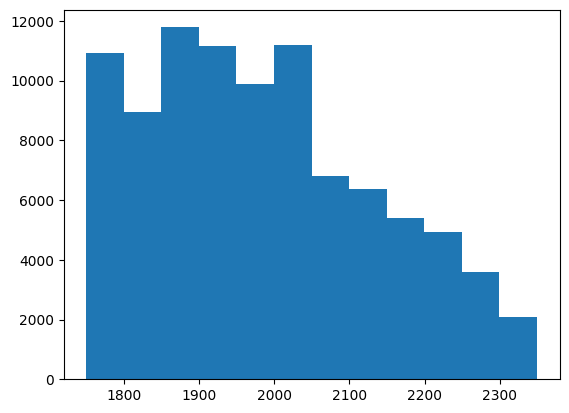

In [34]:
#histogram
histogram_min_recency = plt.hist(min_recency_per_customer.recency, bins=12)
plt.show()

#### K-means analysis recency

In [35]:
min_recency_per_customer.head()

customer_unique_id  recency
0  0000366f3b9a7992bf8c76cfdf3221e2     1860
1  0000b849f77a49e4a4ce2b2a4ca5be3f     1863
2  0000f46a3911fa3c0805444483337064     2286
3  0000f6ccb0745a6a4b88665a16c9f078     2070
4  0004aac84e0df4da2b147fca70cf8255     2037

##### Functions

In [36]:
import multiprocessing # allow parallel processing, reducing computating processing time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import trange # create simple progress bars to see the progress of the calculation

# ---------- Elbow plot function ---------- #
def elbow_plot(X,title): # define a function that takes 2 arguments: X and title

    sse={} # create an empty dictionary to hold SSE values for each k. SSE (sum of squared erros) is also known as inertia

    for k in range(1, 10): # define the number of iterations, from 1 to 9, to store the SSE for each k. An example of a dictionary with values would be: "name_students = {"A": "Yasmin", "B": Carlos}"
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X) # K-means is the model, fit is the function to train the model with data X. We defined 2 parameters but more can be defined
        sse[k] = kmeans.inertia_ # assign the values of inertia to each 'k' of the sse dictionary. Inertia is the difference between the observed value and predicted. The one the model cannot explain.

    plt.plot(list(sse.keys()), list(sse.values())) #keys are each of the 'k', values are each of the 'sse'
    plt.xlabel('N clusters')
    plt.ylabel('SSE')
    plt.title(title)
    plt.show()


# ---------- Silhouette score function ---------- # define the silhouette score function. It is referred below in the function: compute_silhouette_score_gridsearch
def compute_silhouette_score(X_scaled, n_clusters): # X as it is a function and we will substitute in the future for the actual dataset
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    return (n_clusters, score)


# ---------- Silhouette score function without multiprocessing ---------- #
def compute_silhouette_score_gridsearch(X, min_clusters, max_clusters, scale=True): # the function perform a grid search to find the best number of clusters.

    # scale data using minmax - another option would be normalization (z-score)
    if scale: # the code checks if scale = true. If it is, it scale the data using the MinMaxScaler(). I think it will always be true in the way it was written
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X) # scaled data is stored in X_scaled
    else:
        X_scaled = X.copy() # data is not scaled

    results = [] # store the results of each interaction in the next few rows of code

    # run a simplified grid search; it iterates over pre defined values of clusters and compute the score for each of them
    best_score = float('-inf') # set the value for minus infinity. Obs: every value is greater than -inf
    best_kmeans = None
    for n_clusters in trange(min_clusters, max_clusters + 1): # iterate between min and max number of clusters with trange function to generate the progress bar
        score = compute_silhouette_score(X_scaled, n_clusters)[1] # create a tuple (like a list) and store the second element, which is the (silhouette) score
        if score > best_score: # evaluates if the score just calculated is greater than the best_score. That's why we set the best score as - infinity
            best_score = score
            best_kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        results.append((n_clusters, score)) # results list is appended in the tuple (n_clusters, score). Append is used to add an element in the end of the list

    print(f"Best silhouette score: {best_score}")
    print(f"Best k-means model: {best_kmeans}")
    return results # returns the number of clusters and their corresponding silhouette scores for each iteration of the grid search


# ---------- Silhouette plot function ---------- #
def silhouette_vis(X):
    # Extract the number of clusters and silhouette scores from the results
    num_clusters = [X[0] for X in X] # extract the number of clusters from the results list, where index = 0
    silhouette_scores = [X[1] for X in X] #extract the silhouette scores from the results list, where index = 1

    # Plot the silhouette scores
    plt.plot(num_clusters, silhouette_scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Number of clusters vs Silhouette score')
    plt.show()


# ----------- Silhouette plot function 2 ---------- #
def plot_silhouette(X, k, sample_size=None):
    if sample_size:
        X = resample(X, n_samples=sample_size, random_state=0)

    # Perform clustering using KMeans algorithm with random seed
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    # Calculate silhouette score for each data point
    silhouette_scores = silhouette_samples(X, kmeans.labels_)

    # Calculate mean silhouette score for entire dataset
    mean_silhouette_score = silhouette_score(X, kmeans.labels_)

    # Create Silhouette plot
    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower, y_upper = 0, 0
    for i in range(k):
        cluster_silhouette_scores = silhouette_scores[kmeans.labels_ == i]
        cluster_silhouette_scores.sort()
        y_upper += len(cluster_silhouette_scores)
        ax.barh(range(y_lower, y_upper), cluster_silhouette_scores, height=1.0)
        ax.text(-0.05, (y_lower + y_upper) / 2, str(i))
        y_lower += len(cluster_silhouette_scores)

    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=mean_silhouette_score, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlim([-1, 1])
    ax.set_title(f"Silhouette coefficient for {k} cluster labels")
    plt.show()

# ------- Assign the cluster label for each datapoint ------- #

def assign_cluster_label(df, column_name, n_clusters, random_state=0, scale=True):
    selected_column = df[column_name] # .astype(float)  # Convert selected column to float data type
    if scale:
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(selected_column.values.reshape(-1, 1))
    else:
        X_scaled = selected_column.values.reshape(-1, 1).copy()

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    return kmeans.fit_predict(X_scaled)  #method that computes clusters centers and predict cluster index for each sample

# ------- Ordernate cluster label to preferred order ------- #

def ordenate_cluster(df, previous_cluster_label, rfm_data, ascending):
    df_new = df.groupby(previous_cluster_label, as_index=False)[rfm_data].mean()
    df_new = df_new.sort_values(by=rfm_data,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[previous_cluster_label,'index']], on=previous_cluster_label)
    df_final = df_final.drop([previous_cluster_label],axis=1)
    df_final = df_final.rename(columns={"index":previous_cluster_label})
    return df_final



##### Continuation of analysis

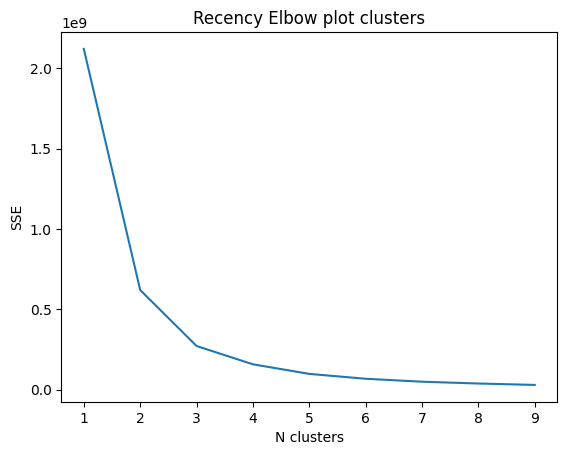

In [37]:
elbow_plot(min_recency_per_customer[['recency']],'Recency Elbow plot clusters')

100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

Best silhouette score: 0.5977889506140455
Best k-means model: KMeans(n_clusters=2, random_state=0)


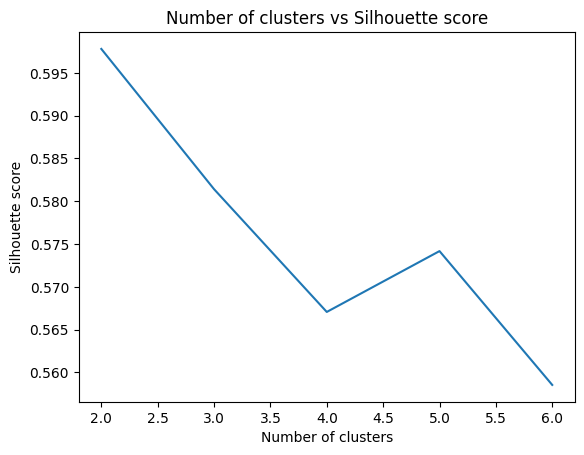

In [38]:
silhouette_recency = compute_silhouette_score_gridsearch(min_recency_per_customer[['recency']].sample(5000,random_state=0),2,6,False)
silhouette_vis(silhouette_recency)

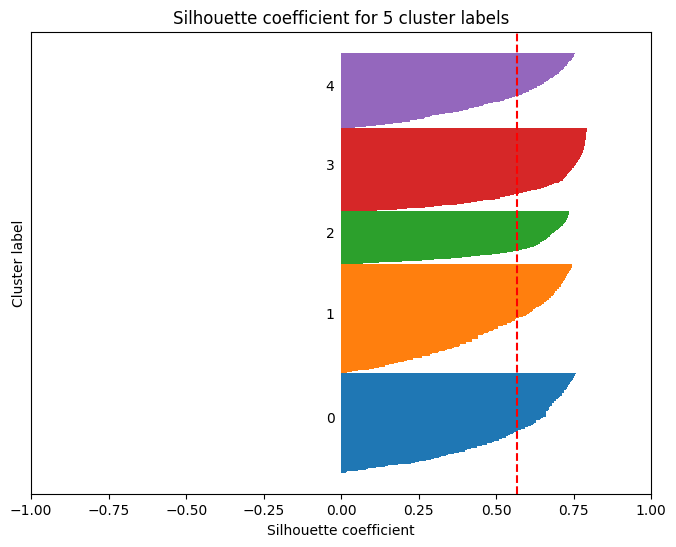

In [39]:
plot_silhouette(min_recency_per_customer[['recency']], k=5, sample_size=5000)

In [40]:
#step by step to test approach
#ordenate_cluster(min_recency_per_customer, 'cluster_label_recency', 'recency', ascending=False)
#min_recency_per_customer['cluster_label_recency'].value_counts()
#min_recency_per_customer_new = min_recency_per_customer.groupby('cluster_label_recency', as_index=False)['recency'].mean()
#display(min_recency_per_customer_new)
#min_recency_per_customer_new = min_recency_per_customer_new.sort_values(by='recency',ascending=False).reset_index(drop=True)
#display(min_recency_per_customer_new)
#min_recency_per_customer_new['index'] = min_recency_per_customer_new.index
#display(min_recency_per_customer_new)
#min_recency_per_customer_final = pd.merge(min_recency_per_customer,min_recency_per_customer_new[['cluster_label_recency','index']], on='cluster_label_recency') # selecting only 2 columns of the dataframe to merge
#display(min_recency_per_customer_final)
#min_recency_per_customer_final = min_recency_per_customer_final.drop(['cluster_label_recency'],axis=1)
#min_recency_per_customer_final = min_recency_per_customer_final.rename(columns={"index":'updated_cluster_label_recency'})
#display(min_recency_per_customer_final)
#min_recency_per_customer_final['updated_cluster_label_recency'].value_counts() #qc only

In [41]:
#assign cluster label to the data

min_recency_per_customer[f'cluster_label_recency'] = assign_cluster_label(min_recency_per_customer, 'recency', 5, 0, True)
display(min_recency_per_customer)

#min_recency_per_customer['cluster_label_recency'].value_counts() # qc only

customer_unique_id  recency  cluster_label_recency
0      0000366f3b9a7992bf8c76cfdf3221e2     1860                      1
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1863                      1
2      0000f46a3911fa3c0805444483337064     2286                      0
3      0000f6ccb0745a6a4b88665a16c9f078     2070                      3
4      0004aac84e0df4da2b147fca70cf8255     2037                      2
...                                 ...      ...                    ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684     2196                      0
93078  fffea47cd6d3cc0a88bd621562a9d061     2011                      2
93079  ffff371b4d645b6ecea244b27531430a     2317                      0
93080  ffff5962728ec6157033ef9805bacc48     1868                      1
93081  ffffd2657e2aad2907e67c3e9daecbeb     2233                      0

[93082 rows x 3 columns]

In [42]:
#update cluster labels to create an order

min_recency_per_customer_new = ordenate_cluster(min_recency_per_customer, 'cluster_label_recency', 'recency', ascending=False) #according to the function, necessary to create a new dataframe
display(min_recency_per_customer_new)

customer_unique_id  recency  cluster_label_recency
0      0000366f3b9a7992bf8c76cfdf3221e2     1860                      3
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1863                      3
2      0004bd2a26a76fe21f786e4fbd80607f     1895                      3
3      00050ab1314c0e55a6ca13cf7181fecf     1880                      3
4      00053a61a98854899e70ed204dd4bafe     1931                      3
...                                 ...      ...                    ...
93077  ffee94d548cef05b146d825a7648dab4     1781                      4
93078  fff22793223fe80c97a8fd02ac5c6295     1813                      4
93079  fff3e1d7bc75f11dc7670619b2e61840     1789                      4
93080  fff5eb4918b2bf4b2da476788d42051c     1807                      4
93081  fff96bc586f78b1f070da28c4977e810     1763                      4

[93082 rows x 3 columns]

In [43]:
#describe recency in terms of cluster_label

min_recency_per_customer_new.groupby('cluster_label_recency')['recency'].describe()

count         mean        std     min     25%  \
cluster_label_recency                                                    
0                      12224.0  2250.440772  43.247573  2185.0  2213.0   
1                      15530.0  2119.008371  34.995514  2061.0  2089.0   
2                      22292.0  2003.548582  30.673536  1951.0  1975.0   
3                      23679.0  1897.889311  30.056099  1847.0  1871.0   
4                      19357.0  1795.628971  26.580841  1749.0  1772.0   

                          50%     75%     max  
cluster_label_recency                          
0                      2243.0  2285.0  2350.0  
1                      2118.0  2149.0  2184.0  
2                      2008.0  2027.0  2060.0  
3                      1897.0  1925.0  1950.0  
4                      1792.0  1819.0  1846.0

### Frequency

In [44]:
# define the max number of items in an order

Olist_datasets_merged_4['max_num_items'] = Olist_datasets_merged_4.groupby('order_id')['order_item_id'].transform('max')
display(Olist_datasets_merged_4)

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
117596    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2018-08-13              1   
4                         2018-09-04              1   
...                              ...            ...   
117596                    2018-03-02              1   
117597                    2017-09-27              1   
117598                    2018-02-15              1   
117599                    2018-02-15              2   
117600                    2018-04-03              1   

                              product_id  ...  \
0       87285b34884572647811a353c7ac498a  ...   
1       87285b34884572647811a353c7ac498a  ...   
2       87285b34884572647811a353c7ac498a  ...   
3       595fac2a385ac33a80bd5114aec74eb8  ...   
4       aa4383b373c6aca5d8797843e5594415  ...   
...                                  ...  ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...   
117597  b80910977a37536adeddd63663f916ad  ...   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  ...   
117599  d1c427060a0f73f6b889a5c7c61f2ac4  ...   
117600  006619bbed68b000c8ba3f8725d5409e  ...   

                      customer_unique_id customer_zip_code_prefix  \
0       7c396fd4830fd04220f754e42b4e5bff                     3149   
1       7c396fd4830fd04220f754e42b4e5bff                     

In [45]:
Olist_datasets_merged_4['max_num_items'].describe()

count    114680.000000
mean          1.392483
std           1.110025
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: max_num_items, dtype: float64

In [46]:
max_num_items_per_order = Olist_datasets_merged_4['max_num_items'].value_counts(normalize=True)*100
display(max_num_items_per_order)

1     78.837635
2     13.458319
3      3.581270
4      1.761423
6      1.009766
5      0.850192
7      0.146495
10     0.069759
8      0.055807
12     0.052319
11     0.038368
20     0.034880
15     0.026160
14     0.024416
9      0.023544
21     0.018312
13     0.011336
Name: max_num_items, dtype: float64

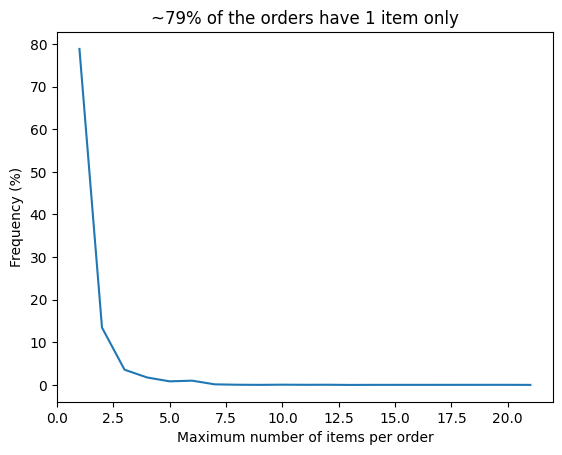

In [47]:
# Create line plot
max_num_items_per_order = max_num_items_per_order.sort_index() #sort series by index
plt.plot(max_num_items_per_order.index, max_num_items_per_order.values)

# Set plot labels and title
plt.xlabel('Maximum number of items per order')
plt.ylabel('Frequency (%)')
plt.title('~79% of the orders have 1 item only') # we won't add complexity to the mode; we will treat as the orders had 1 item only

# Display the plot
plt.show()

In [48]:
# Calculate frequency

Olist_datasets_frequency = Olist_datasets_merged_4.groupby('customer_unique_id', as_index=False)['max_num_items'].sum()
Olist_datasets_frequency.rename(columns={'max_num_items':'num_items'})
display(Olist_datasets_frequency)

customer_unique_id  max_num_items
0      0000366f3b9a7992bf8c76cfdf3221e2              1
1      0000b849f77a49e4a4ce2b2a4ca5be3f              1
2      0000f46a3911fa3c0805444483337064              1
3      0000f6ccb0745a6a4b88665a16c9f078              1
4      0004aac84e0df4da2b147fca70cf8255              1
...                                 ...            ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684              4
93078  fffea47cd6d3cc0a88bd621562a9d061              1
93079  ffff371b4d645b6ecea244b27531430a              1
93080  ffff5962728ec6157033ef9805bacc48              1
93081  ffffd2657e2aad2907e67c3e9daecbeb              1

[93082 rows x 2 columns]

In [49]:
Olist_datasets_frequency.describe()

max_num_items
count   93082.000000
mean        1.715584
std         4.445693
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       441.000000

In [50]:
# violin plot
violin_plot_frequency = px.violin(Olist_datasets_frequency, x = 'max_num_items', box=True, title = 'Violin plot of number of items').show()

In [51]:
# calculate relative frequency

Olist_datasets_frequency_2 = Olist_datasets_merged_4.groupby('customer_unique_id', as_index=False)['order_id'].nunique()
Olist_datasets_frequency_2 = Olist_datasets_frequency_2.rename(columns={"order_id":"relative_frequency"})
display(Olist_datasets_frequency_2)

customer_unique_id  relative_frequency
0      0000366f3b9a7992bf8c76cfdf3221e2                   1
1      0000b849f77a49e4a4ce2b2a4ca5be3f                   1
2      0000f46a3911fa3c0805444483337064                   1
3      0000f6ccb0745a6a4b88665a16c9f078                   1
4      0004aac84e0df4da2b147fca70cf8255                   1
...                                 ...                 ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684                   1
93078  fffea47cd6d3cc0a88bd621562a9d061                   1
93079  ffff371b4d645b6ecea244b27531430a                   1
93080  ffff5962728ec6157033ef9805bacc48                   1
93081  ffffd2657e2aad2907e67c3e9daecbeb                   1

[93082 rows x 2 columns]

In [52]:
Olist_datasets_frequency_2.describe()

relative_frequency
count        93082.000000
mean             1.033368
std              0.209013
min              1.000000
25%              1.000000
50%              1.000000
75%              1.000000
max             15.000000

In [53]:
# violin plot
violin_plot_frequency_2 = px.violin(Olist_datasets_frequency_2, x = 'relative_frequency', box=True, title = 'Violin plot of relative frequency').show()

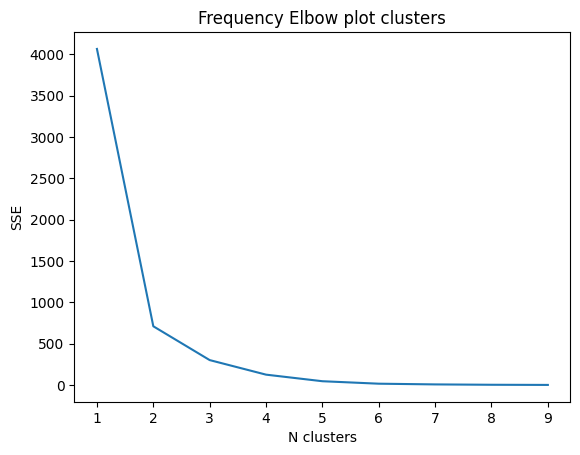

In [54]:
elbow_plot(Olist_datasets_frequency_2[['relative_frequency']],'Frequency Elbow plot clusters')

100%|██████████| 5/5 [00:01<00:00,  3.38it/s]


Best silhouette score: 0.9996
Best k-means model: KMeans(n_clusters=5, random_state=0)


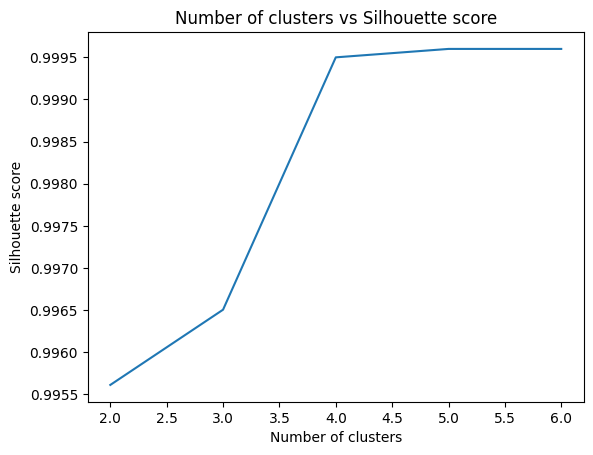

In [55]:
silhouette_frequency = compute_silhouette_score_gridsearch(Olist_datasets_frequency_2[['relative_frequency']].sample(5000,random_state=0),2,6,False)
silhouette_vis(silhouette_frequency)

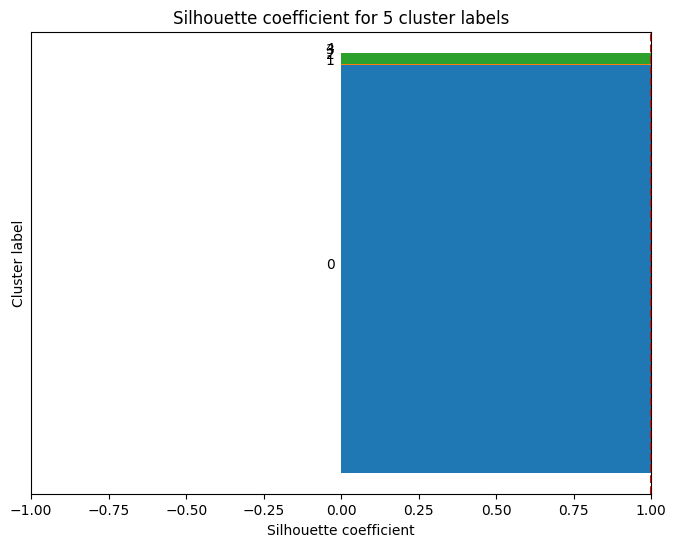

In [56]:
plot_silhouette(Olist_datasets_frequency_2[['relative_frequency']], k=5, sample_size=5000)

In [57]:
display(Olist_datasets_frequency_2)

customer_unique_id  relative_frequency
0      0000366f3b9a7992bf8c76cfdf3221e2                   1
1      0000b849f77a49e4a4ce2b2a4ca5be3f                   1
2      0000f46a3911fa3c0805444483337064                   1
3      0000f6ccb0745a6a4b88665a16c9f078                   1
4      0004aac84e0df4da2b147fca70cf8255                   1
...                                 ...                 ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684                   1
93078  fffea47cd6d3cc0a88bd621562a9d061                   1
93079  ffff371b4d645b6ecea244b27531430a                   1
93080  ffff5962728ec6157033ef9805bacc48                   1
93081  ffffd2657e2aad2907e67c3e9daecbeb                   1

[93082 rows x 2 columns]

In [58]:
#assign cluster label to the data

Olist_datasets_frequency_2[f'cluster_label_frequency'] = assign_cluster_label(Olist_datasets_frequency_2, 'relative_frequency', 5, 0, True)
display(Olist_datasets_frequency_2)

#Olist_datasets_frequency_2['cluster_label_frequency'].value_counts() # qc only

customer_unique_id  relative_frequency  \
0      0000366f3b9a7992bf8c76cfdf3221e2                   1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f                   1   
2      0000f46a3911fa3c0805444483337064                   1   
3      0000f6ccb0745a6a4b88665a16c9f078                   1   
4      0004aac84e0df4da2b147fca70cf8255                   1   
...                                 ...                 ...   
93077  fffcf5a5ff07b0908bd4e2dbc735a684                   1   
93078  fffea47cd6d3cc0a88bd621562a9d061                   1   
93079  ffff371b4d645b6ecea244b27531430a                   1   
93080  ffff5962728ec6157033ef9805bacc48                   1   
93081  ffffd2657e2aad2907e67c3e9daecbeb                   1   

       cluster_label_frequency  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
93077                        0  
93078                        0  
93079                        0  
93080                        0  
93081                        0  

[93082 rows x 3 columns]

In [59]:
#update cluster labels to create an order

Olist_datasets_frequency_new = ordenate_cluster(Olist_datasets_frequency_2, 'cluster_label_frequency', 'relative_frequency', ascending=True) #according to the function, necessary to create a new dataframe
display(Olist_datasets_frequency_new)

customer_unique_id  relative_frequency  \
0      0000366f3b9a7992bf8c76cfdf3221e2                   1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f                   1   
2      0000f46a3911fa3c0805444483337064                   1   
3      0000f6ccb0745a6a4b88665a16c9f078                   1   
4      0004aac84e0df4da2b147fca70cf8255                   1   
...                                 ...                 ...   
93077  dc813062e0fc23409cd255f7f53c7074                   6   
93078  de34b16117594161a6a89c50b289d35a                   5   
93079  f0e310a6839dce9de1638e0fe5ab282a                   6   
93080  fe81bb32c243a86b2f86fbf053fe6140                   5   
93081  8d50f5eadf50201ccdcedfb9e2ac8455                  15   

       cluster_label_frequency  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
93077                        3  
93078                        3  
93079                        3  
93080                        3  
93081                        4  

[93082 rows x 3 columns]

In [60]:
#describe recency in terms of cluster_label

Olist_datasets_frequency_new.groupby('cluster_label_frequency')['relative_frequency'].describe()

count       mean       std   min   25%   50%   75%  \
cluster_label_frequency                                                         
0                        90294.0   1.000000  0.000000   1.0   1.0   1.0   1.0   
1                         2561.0   2.000000  0.000000   2.0   2.0   2.0   2.0   
2                          208.0   3.134615  0.342136   3.0   3.0   3.0   3.0   
3                           18.0   5.833333  1.098127   5.0   5.0   5.5   6.0   
4                            1.0  15.000000       NaN  15.0  15.0  15.0  15.0   

                          max  
cluster_label_frequency        
0                         1.0  
1                         2.0  
2                         4.0  
3                         9.0  
4                        15.0

### Monetary

In [61]:
display(Olist_datasets_merged_4)

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
117596  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
117597  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
117598  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117599  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
117600  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
...             ...                      ...                 ...   
117596    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
117597    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
117598    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117599    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
117600    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
117596          2018-02-07 23:22:42           2018-02-28 17:37:56   
117597          2017-08-28 20:52:26           2017-09-21 11:24:17   
117598          2018-01-12 15:35:03           2018-01-25 23:32:54   
117599          2018-01-12 15:35:03           2018-01-25 23:32:54   
117600          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2018-08-13              1   
4                         2018-09-04              1   
...                              ...            ...   
117596                    2018-03-02              1   
117597                    2017-09-27              1   
117598                    2018-02-15              1   
117599                    2018-02-15              2   
117600                    2018-04-03              1   

                              product_id  ...  \
0       87285b34884572647811a353c7ac498a  ...   
1       87285b34884572647811a353c7ac498a  ...   
2       87285b34884572647811a353c7ac498a  ...   
3       595fac2a385ac33a80bd5114aec74eb8  ...   
4       aa4383b373c6aca5d8797843e5594415  ...   
...                                  ...  ...   
117596  f1d4ce8c6dd66c47bbaa8c6781c2a923  ...   
117597  b80910977a37536adeddd63663f916ad  ...   
117598  d1c427060a0f73f6b889a5c7c61f2ac4  ...   
117599  d1c427060a0f73f6b889a5c7c61f2ac4  ...   
117600  006619bbed68b000c8ba3f8725d5409e  ...   

                      customer_unique_id customer_zip_code_prefix  \
0       7c396fd4830fd04220f754e42b4e5bff                     3149   
1       7c396fd4830fd04220f754e42b4e5bff                     

In [62]:
monetary_df = Olist_datasets_merged_4[['customer_unique_id','payment_value']].copy()

# Sort the DataFrame by 'customer_unique_id' and 'payment_value'
monetary_df.sort_values(['customer_unique_id', 'payment_value'], inplace=True)

# Group the DataFrame by 'customer_unique_id' and select the sum of 'payment_value'
monetary_df_2 = monetary_df.groupby('customer_unique_id')['payment_value'].sum().reset_index().rename(columns={'payment_value':'monetary'}) #reset_index used to transform in a dataframe

# Output the results
display(monetary_df_2)

customer_unique_id  monetary
0      0000366f3b9a7992bf8c76cfdf3221e2    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2      0000f46a3911fa3c0805444483337064     86.22
3      0000f6ccb0745a6a4b88665a16c9f078     43.62
4      0004aac84e0df4da2b147fca70cf8255    196.89
...                                 ...       ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684   4134.84
93078  fffea47cd6d3cc0a88bd621562a9d061     84.58
93079  ffff371b4d645b6ecea244b27531430a    112.46
93080  ffff5962728ec6157033ef9805bacc48    133.69
93081  ffffd2657e2aad2907e67c3e9daecbeb     71.56

[93082 rows x 2 columns]

In [63]:
monetary_df_2.describe()

monetary
count   93082.000000
mean      211.756724
std       642.784906
min         9.590000
25%        63.732500
50%       112.945000
75%       201.650000
max    109312.640000

In [64]:
# violin plot
violin_plot_3 = px.violin(monetary_df_2, x = 'monetary', box=True, title = 'Violin plot of monetary value').show()

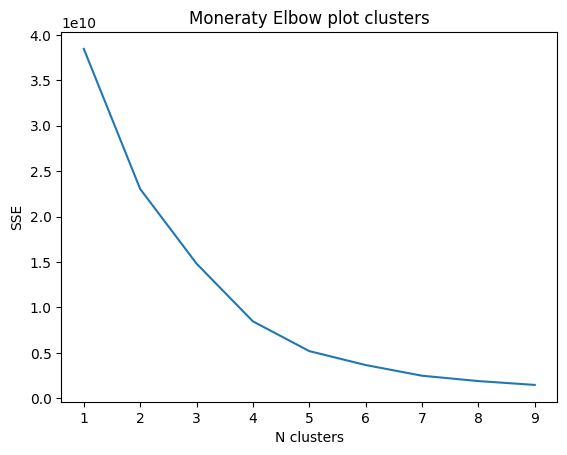

In [65]:
elbow_plot(monetary_df_2[['monetary']],'Moneraty Elbow plot clusters')

100%|██████████| 5/5 [00:01<00:00,  3.31it/s]

Best silhouette score: 0.9546533626349095
Best k-means model: KMeans(n_clusters=3, random_state=0)


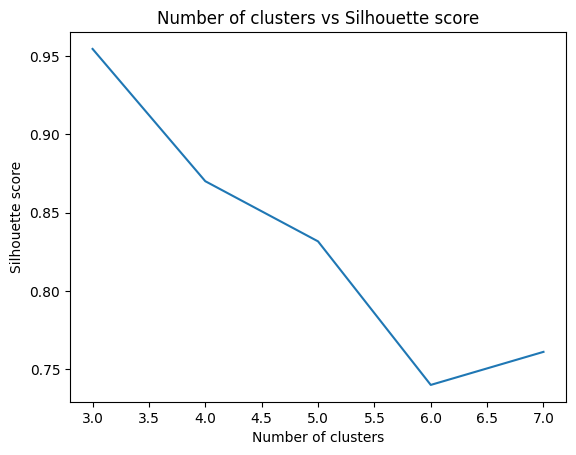

In [66]:
silhouette_monetary = compute_silhouette_score_gridsearch(monetary_df_2[['monetary']].sample(5000,random_state=0),3,7,False)
silhouette_vis(silhouette_monetary)

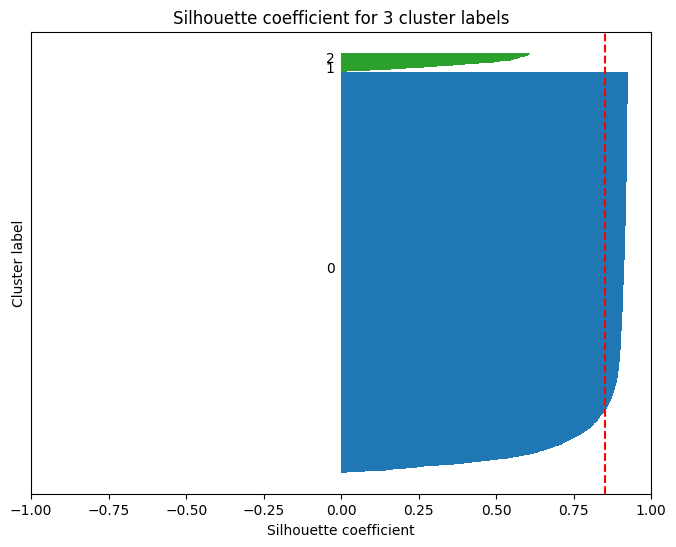

In [67]:
plot_silhouette(monetary_df_2[['monetary']], k=3, sample_size=5000)

In [68]:
display(monetary_df_2)

customer_unique_id  monetary
0      0000366f3b9a7992bf8c76cfdf3221e2    141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f     27.19
2      0000f46a3911fa3c0805444483337064     86.22
3      0000f6ccb0745a6a4b88665a16c9f078     43.62
4      0004aac84e0df4da2b147fca70cf8255    196.89
...                                 ...       ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684   4134.84
93078  fffea47cd6d3cc0a88bd621562a9d061     84.58
93079  ffff371b4d645b6ecea244b27531430a    112.46
93080  ffff5962728ec6157033ef9805bacc48    133.69
93081  ffffd2657e2aad2907e67c3e9daecbeb     71.56

[93082 rows x 2 columns]

In [69]:
#assign cluster label to the data

monetary_df_2[f'cluster_label_monetary'] = assign_cluster_label(monetary_df_2, 'monetary', 3, 0, True)
display(monetary_df_2)

monetary_df_2['cluster_label_monetary'].value_counts() # qc only

customer_unique_id  monetary  cluster_label_monetary
0      0000366f3b9a7992bf8c76cfdf3221e2    141.90                       0
1      0000b849f77a49e4a4ce2b2a4ca5be3f     27.19                       0
2      0000f46a3911fa3c0805444483337064     86.22                       0
3      0000f6ccb0745a6a4b88665a16c9f078     43.62                       0
4      0004aac84e0df4da2b147fca70cf8255    196.89                       0
...                                 ...       ...                     ...
93077  fffcf5a5ff07b0908bd4e2dbc735a684   4134.84                       2
93078  fffea47cd6d3cc0a88bd621562a9d061     84.58                       0
93079  ffff371b4d645b6ecea244b27531430a    112.46                       0
93080  ffff5962728ec6157033ef9805bacc48    133.69                       0
93081  ffffd2657e2aad2907e67c3e9daecbeb     71.56                       0

[93082 rows x 3 columns]

0    92650
2      424
1        8
Name: cluster_label_monetary, dtype: int64

In [70]:
#update cluster labels to create an order

monetary_df_new = ordenate_cluster(monetary_df_2, 'cluster_label_monetary', 'monetary', ascending=True) #according to the function, it is necessary to create a new dataframe
display(monetary_df_new)

customer_unique_id  monetary  cluster_label_monetary
0      0000366f3b9a7992bf8c76cfdf3221e2    141.90                       0
1      0000b849f77a49e4a4ce2b2a4ca5be3f     27.19                       0
2      0000f46a3911fa3c0805444483337064     86.22                       0
3      0000f6ccb0745a6a4b88665a16c9f078     43.62                       0
4      0004aac84e0df4da2b147fca70cf8255    196.89                       0
...                                 ...       ...                     ...
93077  763c8b1c9c68a0229c42c9fc6f662b93  29099.52                       2
93078  c402f431464c72e27330a67f7b94d4fb  44048.00                       2
93079  c8460e4251689ba205045f3ea17884a1  27935.46                       2
93080  eae0a83d752b1dd32697e0e7b4221656  25051.89                       2
93081  ef8d54b3797ea4db1d63f0ced6a906e9  30186.00                       2

[93082 rows x 3 columns]

In [71]:
#describe recency in terms of cluster_label

monetary_df_new.groupby('cluster_label_monetary')['monetary'].describe()

count          mean           std       min  \
cluster_label_monetary                                                  
0                       92650.0    187.372703    246.742052      9.59   
1                         424.0   4724.716179   3012.587977   2459.47   
2                           8.0  43422.343750  27648.337650  25051.89   

                               25%       50%        75%        max  
cluster_label_monetary                                              
0                          63.5525    112.42    199.260    2457.44  
1                        2951.4125   3666.52   5289.465   22346.60  
2                       28808.5050  33337.62  44350.000  109312.64

### Overall score

In [72]:
# view the separated datasets for R, F and M

display(min_recency_per_customer_new, Olist_datasets_frequency_new, monetary_df_new)

customer_unique_id  recency  cluster_label_recency
0      0000366f3b9a7992bf8c76cfdf3221e2     1860                      3
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1863                      3
2      0004bd2a26a76fe21f786e4fbd80607f     1895                      3
3      00050ab1314c0e55a6ca13cf7181fecf     1880                      3
4      00053a61a98854899e70ed204dd4bafe     1931                      3
...                                 ...      ...                    ...
93077  ffee94d548cef05b146d825a7648dab4     1781                      4
93078  fff22793223fe80c97a8fd02ac5c6295     1813                      4
93079  fff3e1d7bc75f11dc7670619b2e61840     1789                      4
93080  fff5eb4918b2bf4b2da476788d42051c     1807                      4
93081  fff96bc586f78b1f070da28c4977e810     1763                      4

[93082 rows x 3 columns]

customer_unique_id  relative_frequency  \
0      0000366f3b9a7992bf8c76cfdf3221e2                   1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f                   1   
2      0000f46a3911fa3c0805444483337064                   1   
3      0000f6ccb0745a6a4b88665a16c9f078                   1   
4      0004aac84e0df4da2b147fca70cf8255                   1   
...                                 ...                 ...   
93077  dc813062e0fc23409cd255f7f53c7074                   6   
93078  de34b16117594161a6a89c50b289d35a                   5   
93079  f0e310a6839dce9de1638e0fe5ab282a                   6   
93080  fe81bb32c243a86b2f86fbf053fe6140                   5   
93081  8d50f5eadf50201ccdcedfb9e2ac8455                  15   

       cluster_label_frequency  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
93077                        3  
93078                        3  
93079                        3  
93080                        3  
93081                        4  

[93082 rows x 3 columns]

customer_unique_id  monetary  cluster_label_monetary
0      0000366f3b9a7992bf8c76cfdf3221e2    141.90                       0
1      0000b849f77a49e4a4ce2b2a4ca5be3f     27.19                       0
2      0000f46a3911fa3c0805444483337064     86.22                       0
3      0000f6ccb0745a6a4b88665a16c9f078     43.62                       0
4      0004aac84e0df4da2b147fca70cf8255    196.89                       0
...                                 ...       ...                     ...
93077  763c8b1c9c68a0229c42c9fc6f662b93  29099.52                       2
93078  c402f431464c72e27330a67f7b94d4fb  44048.00                       2
93079  c8460e4251689ba205045f3ea17884a1  27935.46                       2
93080  eae0a83d752b1dd32697e0e7b4221656  25051.89                       2
93081  ef8d54b3797ea4db1d63f0ced6a906e9  30186.00                       2

[93082 rows x 3 columns]

In [73]:
# merge all the datasets of R, F and M in customer_unique_id

RFM_merged = min_recency_per_customer_new.merge(Olist_datasets_frequency_new, on='customer_unique_id').merge(monetary_df_new,on='customer_unique_id')
display(RFM_merged)

customer_unique_id  recency  cluster_label_recency  \
0      0000366f3b9a7992bf8c76cfdf3221e2     1860                      3   
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1863                      3   
2      0004bd2a26a76fe21f786e4fbd80607f     1895                      3   
3      00050ab1314c0e55a6ca13cf7181fecf     1880                      3   
4      00053a61a98854899e70ed204dd4bafe     1931                      3   
...                                 ...      ...                    ...   
93077  ffee94d548cef05b146d825a7648dab4     1781                      4   
93078  fff22793223fe80c97a8fd02ac5c6295     1813                      4   
93079  fff3e1d7bc75f11dc7670619b2e61840     1789                      4   
93080  fff5eb4918b2bf4b2da476788d42051c     1807                      4   
93081  fff96bc586f78b1f070da28c4977e810     1763                      4   

       relative_frequency  cluster_label_frequency  monetary  \
0                       1                        0    141.90   
1                       1                        0     27.19   
2                       1                        0    166.98   
3                       1                        0     35.38   
4                       1                        0    838.36   
...                   ...                      ...       ...   
93077                   1                        0     35.36   
93078                   1                        0    267.57   
93079                   1                        0     82.51   
93080                   1                        0  17069.76   
93081                   1                        0     63.42   

       cluster_label_monetary  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
93077                       0  
93078                       0  
93079                       0  
93080                       1  
93081                       0  

[93082 rows x 7 columns]

In [74]:
# calculate overall score

RFM_merged['overall_score'] = RFM_merged['cluster_label_recency'] + RFM_merged['cluster_label_frequency'] + RFM_merged['cluster_label_monetary']
display(RFM_merged)

customer_unique_id  recency  cluster_label_recency  \
0      0000366f3b9a7992bf8c76cfdf3221e2     1860                      3   
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1863                      3   
2      0004bd2a26a76fe21f786e4fbd80607f     1895                      3   
3      00050ab1314c0e55a6ca13cf7181fecf     1880                      3   
4      00053a61a98854899e70ed204dd4bafe     1931                      3   
...                                 ...      ...                    ...   
93077  ffee94d548cef05b146d825a7648dab4     1781                      4   
93078  fff22793223fe80c97a8fd02ac5c6295     1813                      4   
93079  fff3e1d7bc75f11dc7670619b2e61840     1789                      4   
93080  fff5eb4918b2bf4b2da476788d42051c     1807                      4   
93081  fff96bc586f78b1f070da28c4977e810     1763                      4   

       relative_frequency  cluster_label_frequency  monetary  \
0                       1                        0    141.90   
1                       1                        0     27.19   
2                       1                        0    166.98   
3                       1                        0     35.38   
4                       1                        0    838.36   
...                   ...                      ...       ...   
93077                   1                        0     35.36   
93078                   1                        0    267.57   
93079                   1                        0     82.51   
93080                   1                        0  17069.76   
93081                   1                        0     63.42   

       cluster_label_monetary  overall_score  
0                           0              3  
1                           0              3  
2                           0              3  
3                           0              3  
4                           0              3  
...                       ...            ...  
93077                       0              4  
93078                       0              4  
93079                       0              4  
93080                       1              5  
93081                       0              4  

[93082 rows x 8 columns]

In [75]:
# view final clusters - note that is too granular, and we may need to group some of them

RFM_merged.groupby('overall_score')['recency','relative_frequency','monetary'].mean()

recency  relative_frequency      monetary
overall_score                                               
0              2250.583621            1.000000    180.054276
1              2121.636773            1.016252    198.463247
2              2006.239719            1.020630    196.959990
3              1901.351732            1.029297    212.480718
4              1800.092200            1.038743    216.950488
5              1808.426451            1.991903   1047.243590
6              1812.191781            3.301370   1920.977397
7              1819.250000            5.250000   1998.283750
8              1761.000000            8.333333  10508.400000

In [76]:
#generate scatterplot

attributes_for_scatter_matrix =  ['recency','relative_frequency','monetary','overall_score']
scatter_matrix_rfm = px.scatter_matrix(RFM_merged[attributes_for_scatter_matrix],
    dimensions=['recency','relative_frequency','monetary'],
    color='overall_score', color_continuous_scale=px.colors.sequential.Rainbow,
    title='Scatter plot of RFM for 9 customer segments')
scatter_matrix_rfm.show()

#### Refining the number of clusters

In [77]:
RFM_merged['overall_score'].value_counts()

3    23552
2    22055
4    19436
1    15321
0    11893
5      741
6       73
7        8
8        3
Name: overall_score, dtype: int64

100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

Best silhouette score: 0.9997
Best k-means model: KMeans(n_clusters=7, random_state=0)


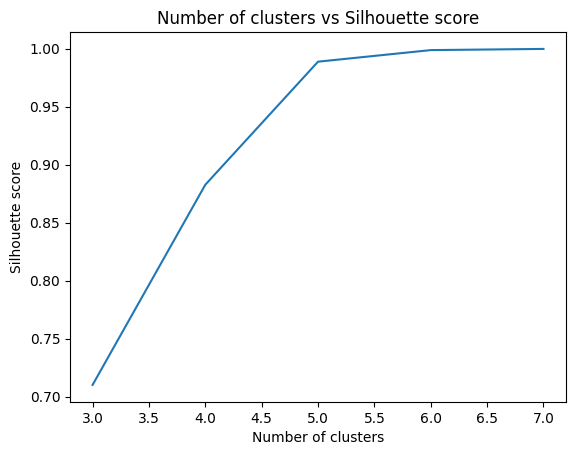

In [78]:
RFM_optimal_cluster = compute_silhouette_score_gridsearch(RFM_merged[['overall_score']].sample(5000,random_state=0),3,7,False)
silhouette_vis(RFM_optimal_cluster)

In [79]:
#assign cluster label to the data

RFM_merged[f'new_overall_score'] = assign_cluster_label(RFM_merged, 'overall_score', 6, 0, True)
display(RFM_merged)

RFM_merged['new_overall_score'].value_counts() # qc only

customer_unique_id  recency  cluster_label_recency  \
0      0000366f3b9a7992bf8c76cfdf3221e2     1860                      3   
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1863                      3   
2      0004bd2a26a76fe21f786e4fbd80607f     1895                      3   
3      00050ab1314c0e55a6ca13cf7181fecf     1880                      3   
4      00053a61a98854899e70ed204dd4bafe     1931                      3   
...                                 ...      ...                    ...   
93077  ffee94d548cef05b146d825a7648dab4     1781                      4   
93078  fff22793223fe80c97a8fd02ac5c6295     1813                      4   
93079  fff3e1d7bc75f11dc7670619b2e61840     1789                      4   
93080  fff5eb4918b2bf4b2da476788d42051c     1807                      4   
93081  fff96bc586f78b1f070da28c4977e810     1763                      4   

       relative_frequency  cluster_label_frequency  monetary  \
0                       1                        0    141.90   
1                       1                        0     27.19   
2                       1                        0    166.98   
3                       1                        0     35.38   
4                       1                        0    838.36   
...                   ...                      ...       ...   
93077                   1                        0     35.36   
93078                   1                        0    267.57   
93079                   1                        0     82.51   
93080                   1                        0  17069.76   
93081                   1                        0     63.42   

       cluster_label_monetary  overall_score  new_overall_score  
0                           0              3                  3  
1                           0              3                  3  
2                           0              3                  3  
3                           0              3                  3  
4                           0              3                  3  
...                       ...            ...                ...  
93077                       0              4                  1  
93078                       0              4                  1  
93079                       0              4                  1  
93080                       1              5                  5  
93081                       0              4                  1  

[93082 rows x 9 columns]

3    23552
0    22055
1    19436
2    15321
4    11893
5      825
Name: new_overall_score, dtype: int64

In [80]:
#update cluster labels to create an order

RFM_merged_new = ordenate_cluster(RFM_merged, 'new_overall_score', 'overall_score', ascending=True) #according to the function, it is necessary to create a new dataframe
display(RFM_merged_new)

customer_unique_id  recency  cluster_label_recency  \
0      0000366f3b9a7992bf8c76cfdf3221e2     1860                      3   
1      0000b849f77a49e4a4ce2b2a4ca5be3f     1863                      3   
2      0004bd2a26a76fe21f786e4fbd80607f     1895                      3   
3      00050ab1314c0e55a6ca13cf7181fecf     1880                      3   
4      00053a61a98854899e70ed204dd4bafe     1931                      3   
...                                 ...      ...                    ...   
93077  fff7219c86179ca6441b8f37823ba3d3     1994                      2   
93078  fffa431dd3fcdefea4b1777d114144f2     2052                      2   
93079  fffb09418989a0dbff854a28163e47c6     2004                      2   
93080  fffbf87b7a1a6fa8b03f081c5f51a201     1993                      2   
93081  fffea47cd6d3cc0a88bd621562a9d061     2011                      2   

       relative_frequency  cluster_label_frequency  monetary  \
0                       1                        0    141.90   
1                       1                        0     27.19   
2                       1                        0    166.98   
3                       1                        0     35.38   
4                       1                        0    838.36   
...                   ...                      ...       ...   
93077                   1                        0    531.60   
93078                   1                        0     81.20   
93079                   1                        0     73.16   
93080                   1                        0    167.32   
93081                   1                        0     84.58   

       cluster_label_monetary  overall_score  new_overall_score  
0                           0              3                  3  
1                           0              3                  3  
2                           0              3                  3  
3                           0              3                  3  
4                           0              3                  3  
...                       ...            ...                ...  
93077                       0              2                  2  
93078                       0              2                  2  
93079                       0              2                  2  
93080                       0              2                  2  
93081                       0              2                  2  

[93082 rows x 9 columns]

In [81]:
# view final clusters

RFM_merged_new.groupby('new_overall_score')['recency','relative_frequency','monetary'].mean()

recency  relative_frequency     monetary
new_overall_score                                              
0                  2250.583621            1.000000   180.054276
1                  2121.636773            1.016252   198.463247
2                  2006.239719            1.020630   196.959990
3                  1901.351732            1.029297   212.480718
4                  1800.092200            1.038743   216.950488
5                  1808.692121            2.162424  1168.182206

In [82]:
#generate scatterplot

attributes_for_scatter_matrix_2 =  ['recency','relative_frequency','monetary','new_overall_score']
scatter_matrix_rfm_2 = px.scatter_matrix(RFM_merged_new[attributes_for_scatter_matrix_2],
    dimensions=['recency','relative_frequency','monetary'],
    color='new_overall_score', color_continuous_scale=px.colors.sequential.Rainbow,
    title='Scatter plot of RFM for 6 customer segments')
scatter_matrix_rfm_2.show()